# Big Data Machine Learning Classification with Spark

<img src='https://datascientest.com/es/files/2024/04/formation-pyspark-python-768x380-1.jpeg'>

Big Data Churn prediction with Spark
Please use pyspark machine learning package to predict customers' behavior.

from pyspark.ml.classification import GBTClassifier

In [1]:
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

In [2]:
df = pd.read_csv("churn.csv")

In [3]:
df.isnull().sum()

Unnamed: 0         0
Names              0
Age                0
Total_Purchase     0
Account_Manager    0
Years              0
Num_Sites          0
Churn              0
dtype: int64

In [4]:
df.head()

,Unnamed: 0,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn
0,0,Cameron Williams,42.0,11066.80,0,7.22,8.0,1
1,1,Kevin Mueller,41.0,11916.22,0,6.50,11.0,1
2,2,Eric Lozano,38.0,12884.75,0,6.67,12.0,1
3,3,Phillip White,42.0,8010.76,0,6.71,10.0,1
4,4,Cynthia Norton,37.0,9191.58,0,5.56,9.0,1


In [5]:
df.shape

(900, 8)

In [6]:
df.columns

Index(['Unnamed: 0', 'Names', 'Age', 'Total_Purchase', 'Account_Manager',
       'Years', 'Num_Sites', 'Churn'],
      dtype='object')

In [7]:
df=df.drop(['Unnamed: 0', 'Names'],axis=1)

In [8]:
for i in df.columns:
    df[i]=df[i].astype(float)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              900 non-null    float64
 1   Total_Purchase   900 non-null    float64
 2   Account_Manager  900 non-null    float64
 3   Years            900 non-null    float64
 4   Num_Sites        900 non-null    float64
 5   Churn            900 non-null    float64
dtypes: float64(6)
memory usage: 42.3 KB


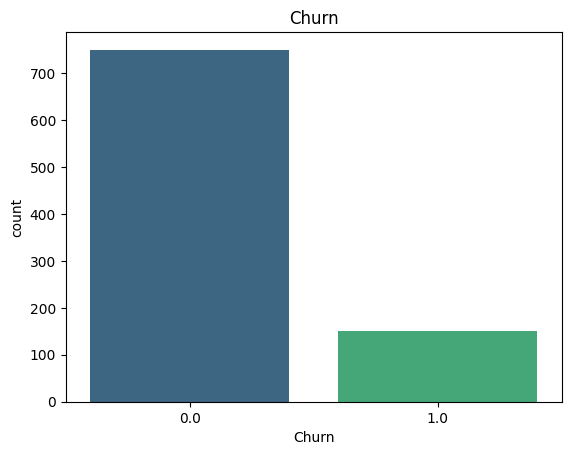

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Churn', data=df, palette='viridis')
plt.title('Churn')
plt.show()

Text(0.5, 1.0, ' Corelasyon  ')

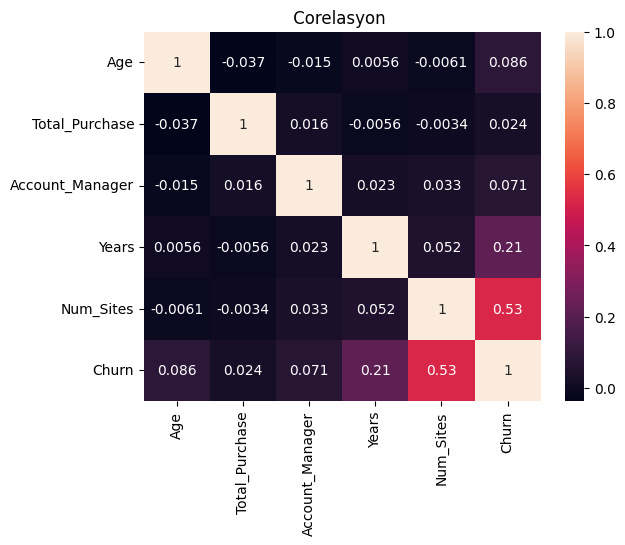

In [12]:
import seaborn as sns
sns.heatmap(df.corr(numeric_only=True),annot=True)
import matplotlib.pyplot as plt 
plt.title(' Corelasyon  ')

In [13]:
# datayı temizlemiş olduk 
df.to_csv('new_data.csv')

# Spark oluşturma 

In [14]:
spark = SparkSession.builder \
    .appName("Churn Prediction") \
    .getOrCreate()

In [15]:
df = spark.read.csv("new_data.csv", header=True, inferSchema=True)

In [16]:
df.show(5)

+---+----+--------------+---------------+-----+---------+-----+
|_c0| Age|Total_Purchase|Account_Manager|Years|Num_Sites|Churn|
+---+----+--------------+---------------+-----+---------+-----+
|  0|42.0|       11066.8|            0.0| 7.22|      8.0|  1.0|
|  1|41.0|      11916.22|            0.0|  6.5|     11.0|  1.0|
|  2|38.0|      12884.75|            0.0| 6.67|     12.0|  1.0|
|  3|42.0|       8010.76|            0.0| 6.71|     10.0|  1.0|
|  4|37.0|       9191.58|            0.0| 5.56|      9.0|  1.0|
+---+----+--------------+---------------+-----+---------+-----+
only showing top 5 rows



In [17]:
df.describe().toPandas().T

,0,1,2,3,4
summary,count,mean,stddev,min,max
_c0,900,449.5,259.95191863111916,0,899
Age,900,41.81666666666667,6.127560416916251,22.0,65.0
Total_Purchase,900,10062.82403333334,2408.644531858096,100.0,18026.01
Account_Manager,900,0.4811111111111111,0.4999208935073339,0.0,1.0
Years,900,5.27315555555555,1.274449013194616,1.0,9.15
Num_Sites,900,8.587777777777777,1.7648355920350969,3.0,14.0
Churn,900,0.16666666666666666,0.3728852122772358,0.0,1.0


In [18]:
#  burada datamızın ilk değerlerini görüyoruz 
df.printSchema()
df.show(5)

root
 |-- _c0: integer (nullable = true)
 |-- Age: double (nullable = true)
 |-- Total_Purchase: double (nullable = true)
 |-- Account_Manager: double (nullable = true)
 |-- Years: double (nullable = true)
 |-- Num_Sites: double (nullable = true)
 |-- Churn: double (nullable = true)

+---+----+--------------+---------------+-----+---------+-----+
|_c0| Age|Total_Purchase|Account_Manager|Years|Num_Sites|Churn|
+---+----+--------------+---------------+-----+---------+-----+
|  0|42.0|       11066.8|            0.0| 7.22|      8.0|  1.0|
|  1|41.0|      11916.22|            0.0|  6.5|     11.0|  1.0|
|  2|38.0|      12884.75|            0.0| 6.67|     12.0|  1.0|
|  3|42.0|       8010.76|            0.0| 6.71|     10.0|  1.0|
|  4|37.0|       9191.58|            0.0| 5.56|      9.0|  1.0|
+---+----+--------------+---------------+-----+---------+-----+
only showing top 5 rows



In [19]:
#Tüm verileri eşsiz mi?
df.distinct().count()

900

In [20]:
df.columns

['_c0',
 'Age',
 'Total_Purchase',
 'Account_Manager',
 'Years',
 'Num_Sites',
 'Churn']

#### VectorAssembler kullanarak modelin öğrenmesi için gerekli özellikleri bir vektör haline getiririz.

In [21]:
assembler = VectorAssembler(
    inputCols=["Age", "Total_Purchase", "Account_Manager", "Years", "Num_Sites"],
    outputCol="features"
)
output = assembler.transform(df)


##  Modeling

In [22]:
train_data, test_data = output.randomSplit([0.7, 0.3], seed=42)

In [23]:
lr = LogisticRegression(labelCol="Churn", featuresCol="features")
lr_model = lr.fit(train_data)

In [24]:
predictions = lr_model.transform(test_data)
predictions.select("Churn", "prediction", "probability").show(10)

+-----+----------+--------------------+
|Churn|prediction|         probability|
+-----+----------+--------------------+
|  1.0|       1.0|[0.14283353178499...|
|  1.0|       1.0|[0.40715631856873...|
|  1.0|       1.0|[0.35168240900934...|
|  1.0|       1.0|[0.23456527636123...|
|  1.0|       1.0|[0.09454005585382...|
|  1.0|       0.0|[0.65246656194400...|
|  1.0|       1.0|[0.10126581661311...|
|  1.0|       0.0|[0.94845911266851...|
|  1.0|       1.0|[0.19299434172898...|
|  1.0|       1.0|[0.16027893739171...|
+-----+----------+--------------------+
only showing top 10 rows



In [25]:
evaluator = BinaryClassificationEvaluator(labelCol="Churn")
accuracy = evaluator.evaluate(predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9137409904673339


### Parametre Ayarlama ve Modeli İyileştirme:
#### CrossValidator kullanarak modelin hiperparametrelerini optimize ederiz.

In [26]:
paramGrid = ParamGridBuilder() \
    .addGrid(lr.regParam, [0.1, 0.01]) \
    .build()

crossval = CrossValidator(
    estimator=lr,
    estimatorParamMaps=paramGrid,
    evaluator=evaluator,
    numFolds=5
)

cvModel = crossval.fit(train_data)

In [27]:
bestModel = cvModel.bestModel
best_predictions = bestModel.transform(test_data)
best_accuracy = evaluator.evaluate(best_predictions)
print(f"Best Model Accuracy: {best_accuracy}")

Best Model Accuracy: 0.9118809579167645


#### GBTClassifier: Gradyan artırmalı ağaçlar, daha karmaşık ilişkileri modellemek için kullanılır ve genellikle daha yüksek doğruluk sunar.
maxIter: Modelin kaç iterasyon boyunca eğitileceğini belirtir.

In [28]:
from pyspark.ml.classification import GBTClassifier

# GBTClassifier'ı tanımlayın
gbt = GBTClassifier(labelCol="Churn", featuresCol="features", maxIter=10)

# Modeli eğitin
gbt_model = gbt.fit(train_data)

# Modeli test edin
gbt_predictions = gbt_model.transform(test_data)

# Modeli değerlendirin
gbt_accuracy = evaluator.evaluate(gbt_predictions)
print(f"GBT Model Accuracy: {gbt_accuracy}")

GBT Model Accuracy: 0.8938037665659146


<Axes: xlabel='Predicted', ylabel='Actual'>

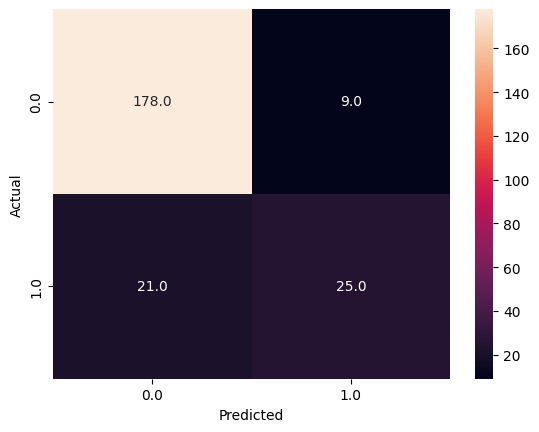

In [29]:
import numpy as np
import pandas as pd
predictions_and_labels = gbt_predictions.select("prediction", "Churn").toPandas()

conf_matrix = pd.crosstab(predictions_and_labels["Churn"], predictions_and_labels["prediction"], rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(conf_matrix,annot=True,fmt='.1f')


In [30]:
from sklearn.metrics import classification_report

y_true = predictions_and_labels["Churn"].values
y_pred = predictions_and_labels["prediction"].values
class_report = classification_report(y_true, y_pred)
print(class_report)


              precision    recall  f1-score   support

         0.0       0.89      0.95      0.92       187
         1.0       0.74      0.54      0.62        46

    accuracy                           0.87       233
   macro avg       0.81      0.75      0.77       233
weighted avg       0.86      0.87      0.86       233

